In [6]:
import numpy as np
import glob
import xarray as xr
import pandas as pd
tmax_path = '/g/data/oe9/project/team-drip/AWAP/AWAP_month_tmin.nc'
tmaxnc = xr.open_dataset(tmax_path)
# radnc = radnc.rename({'e0_avg':'pet'})
tmaxnc = tmaxnc.where(tmaxnc>=0, np.nan)
tmaxnc = tmaxnc.squeeze()
tmaxnc


<xarray.Dataset>
Dimensions:     (latitude: 270, longitude: 280, nv: 2, time: 696)
Coordinates:
  * latitude    (latitude) float64 -24.55 -24.6 -24.65 -24.7 -24.75 -24.8 ...
  * longitude   (longitude) float64 138.5 138.6 138.6 138.7 138.7 138.8 ...
  * time        (time) datetime64[ns] 1960-01-01 1960-02-01 1960-03-01 ...
Dimensions without coordinates: nv
Data variables:
    crs         (time) float64 nan nan nan nan nan nan nan nan nan nan nan ...
    lat_bounds  (time, latitude, nv) float64 nan nan nan nan nan nan nan nan ...
    lon_bounds  (time, longitude, nv) float64 138.5 138.5 138.5 138.6 138.6 ...
    tmin_month  (time, latitude, longitude) float64 26.18 26.23 26.27 26.28 ...

In [7]:
mask_path = '/g/data/oe9/project/team-drip/MDB_MASK/MASK_ARRAY_AWAP.nc'
tmaxmask = xr.open_dataarray(mask_path)
tmaxnc = tmaxnc.where(tmaxmask, drop=True)
tmaxnc

<xarray.Dataset>
Dimensions:     (latitude: 261, longitude: 278, nv: 2, time: 696)
Coordinates:
  * latitude    (latitude) float64 -24.6 -24.65 -24.7 -24.75 -24.8 -24.85 ...
  * longitude   (longitude) float64 138.6 138.6 138.7 138.7 138.8 138.8 ...
  * time        (time) datetime64[ns] 1960-01-01 1960-02-01 1960-03-01 ...
Dimensions without coordinates: nv
Data variables:
    crs         (time, latitude, longitude) float64 nan nan nan nan nan nan ...
    lat_bounds  (time, latitude, nv, longitude) float64 nan nan nan nan nan ...
    lon_bounds  (time, longitude, nv, latitude) float64 nan nan nan nan nan ...
    tmin_month  (time, latitude, longitude) float64 nan nan nan nan nan nan ...

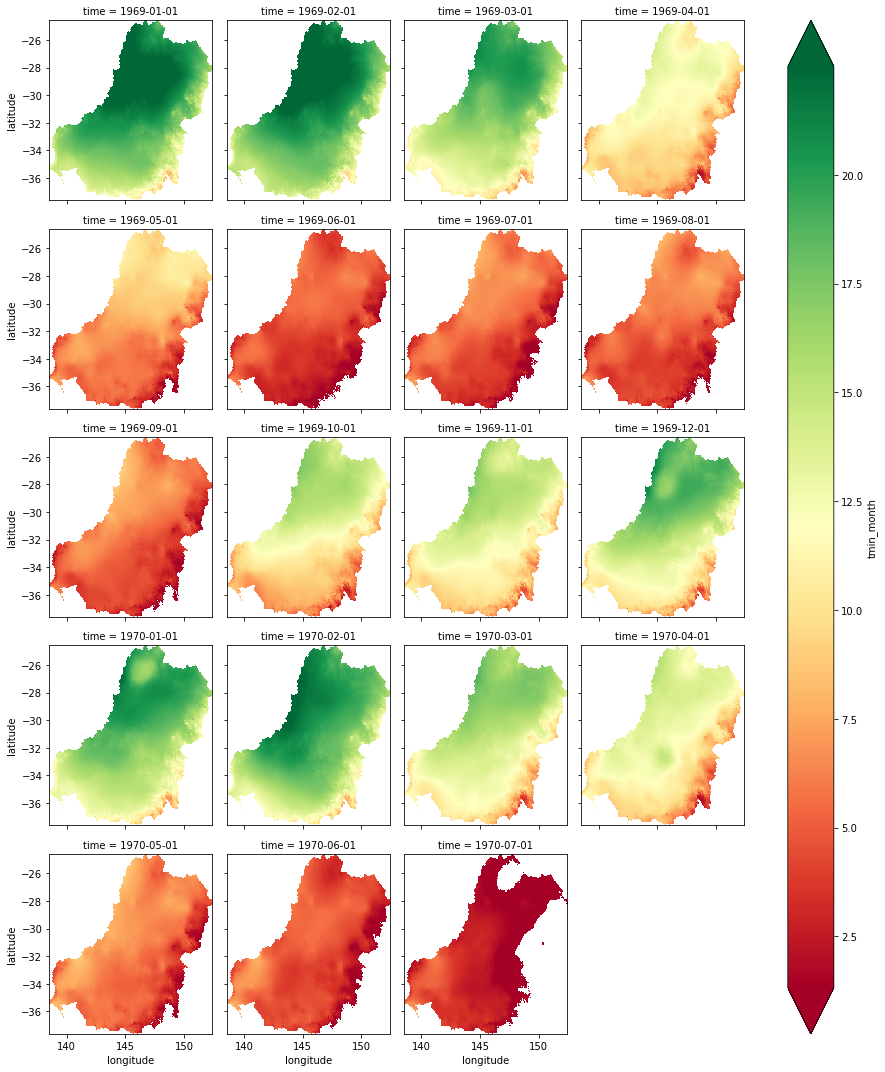

In [10]:
%matplotlib inline
tmaxnc.tmin_month.isel(time=range(108,127)).plot.imshow(col='time', robust = True, col_wrap=4, cmap = 'RdYlGn')
tminnc = tmaxnc

In [11]:
outpath = '/g/data/oe9/project/team-drip/ENV_5km_month/Tmin_5km_month.nc'
tminnc.to_netcdf(outpath, mode = 'w')